In [1]:
from google.colab import drive
drive.mount('./drive')

Mounted at ./drive


In [2]:
import os
os.chdir('./drive/My Drive/Colab Notebooks/Pencil_Sketch/')

In [3]:

#Install imageio package
!pip install imageio

In [4]:

%matplotlib inline
import imageio
import requests
import matplotlib.pyplot as plt
import IPython.display as dp

In [5]:
# img="https://www.lovethisimages.com/wp-content/uploads/2018/04/sorry-images-download-1.jpg"
# dp.Image(requests.get(img).content)

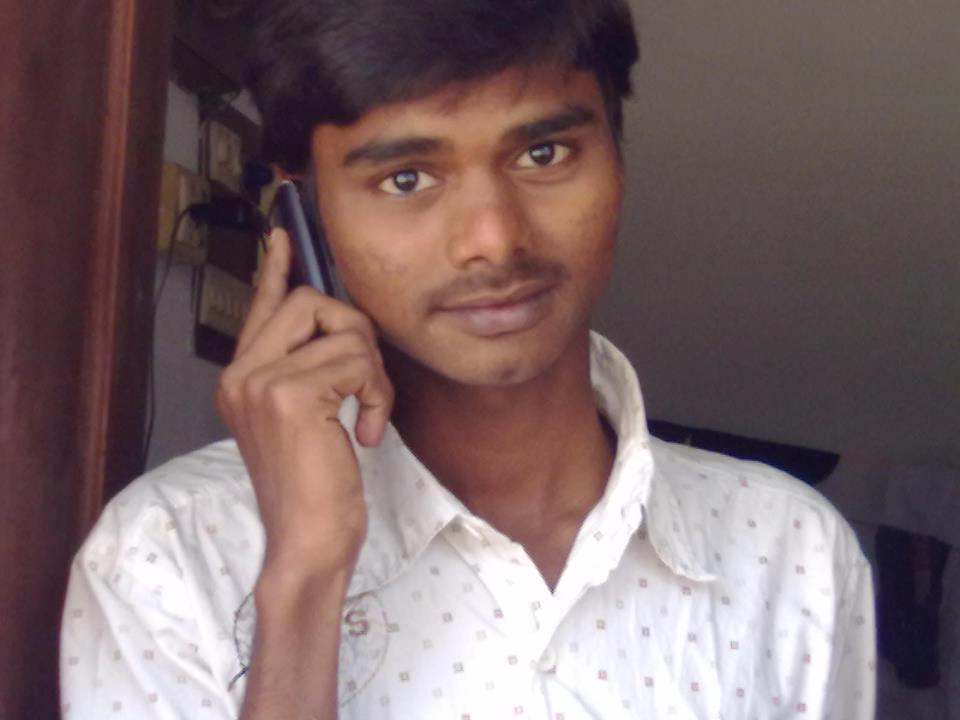

<Figure size 360x360 with 0 Axes>

In [6]:
#Display the image from the web using an URI.
plt.figure(figsize=(5,5))
img="531802_195884207190439_193926703_n.jpg"
dp.Image(img)

In [7]:
#Read the image using imgaeio package's imread method and URI from web using 
source_img = imageio.imread(img)

In [8]:
source_img

Array([[[ 95,  57,  56],
        [ 95,  57,  56],
        [ 95,  57,  56],
        ...,
        [107,  97,  87],
        [107,  97,  87],
        [107,  97,  87]],

       [[ 95,  57,  56],
        [ 95,  57,  56],
        [ 95,  57,  56],
        ...,
        [107,  97,  87],
        [107,  97,  87],
        [107,  97,  87]],

       [[ 95,  57,  56],
        [ 95,  57,  56],
        [ 95,  57,  56],
        ...,
        [107,  97,  87],
        [107,  97,  87],
        [107,  97,  87]],

       ...,

       [[ 76,  52,  65],
        [ 76,  52,  65],
        [ 76,  52,  65],
        ...,
        [ 59,  55,  70],
        [ 60,  56,  71],
        [ 60,  56,  71]],

       [[ 78,  54,  67],
        [ 78,  54,  67],
        [ 78,  54,  67],
        ...,
        [ 59,  55,  70],
        [ 60,  56,  71],
        [ 60,  56,  71]],

       [[ 80,  56,  69],
        [ 80,  56,  69],
        [ 79,  55,  68],
        ...,
        [ 59,  55,  70],
        [ 60,  56,  71],
        [ 60,  56,  71]]

In [9]:
# Make the image Black and White using the formula Y= 0.299*R + 0.587*G + 0.114*B i.e. applying greyscale
import numpy as np

def grayscaleimg(rgb): 
  return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

gryscl_img = grayscaleimg(source_img)

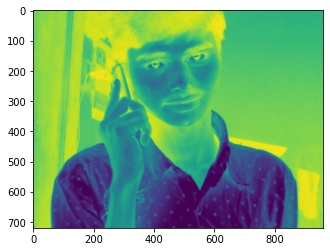

In [10]:
#Invert the image by subtracting it from 255
inv_img = (255 - gryscl_img)
plt.imshow(inv_img)

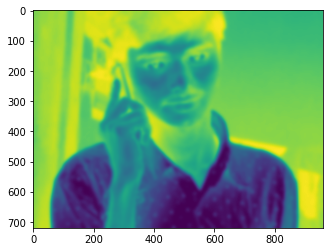

In [11]:
#Blur the image using gaussian filter
import scipy.ndimage
blurred_img = scipy.ndimage.filters.gaussian_filter(inv_img, sigma=5)
plt.imshow(blurred_img)

In [12]:
#Create function to perform dogding(belnding together greyscale and blurred image)
def dodging(blur_img, gryscl_img):
    resultant_dodge=blur_img*255/(255-gryscl_img) 
    resultant_dodge[resultant_dodge>255]=255
    resultant_dodge[gryscl_img==255]=255
    return resultant_dodge.astype('uint8')

In [13]:

#Generate the target image by applying the dodge
target_img= dodging(blurred_img, gryscl_img)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
target_img

Array([[255, 255, 255, ..., 254, 254, 254],
       [255, 255, 255, ..., 254, 254, 254],
       [255, 255, 255, ..., 254, 254, 254],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

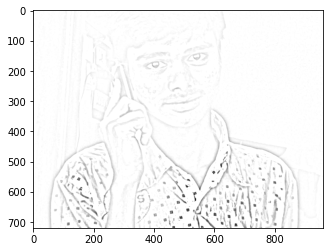

In [15]:
#Display the target image
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(target_img, cmap="gray")
plt.show()

In [16]:
#Save the image
plt.imsave('target_image2.png', target_img, cmap='gray', vmin=0, vmax=255)